Kanishk Mair (kmair@andrew.cmu.edu)
Date: 2018-12-04 10:23:22.467099


- ASSIGNMENT: nn-pvap
- POINTS: 3
- CATEGORY: homework
- RUBRIC: default
- RUBRIC_CATEGORIES: technical, presentation
- RUBRIC_WEIGHTS: 0.8, 0.2
- DUEDATE: 2018-12-07 23:59:59
- GRADER: Noriyuki Yoshio


In this paper: Experimental vapor pressure data and a vapor pressure equation for trifluoroiodomethane (CF3I), [https://www.sciencedirect.com/science/article/pii/0378381296030051?via%3Dihub](https://www.sciencedirect.com/science/article/pii/0378381296030051?via%3Dihub), the following data is provided for the vapor pressure as a function of temperature.



In [24]:
import numpy as np

T = np.array([ 243.15,  245.15,  247.15,  249.15,  251.15,  253.15,  255.15,
         257.15,  259.15,  261.15,  263.15,  265.15,  267.15,  269.15,
         271.15,  273.15,  275.15,  277.15,  279.15,  281.15,  283.15,
         285.15,  287.15,  289.15,  291.15,  293.15,  295.15,  297.15,
         299.15,  301.15,  303.15,  305.15,  307.15,  309.15,  311.15,
         313.15,  315.15,  317.15,  319.15,  321.15,  323.15,  325.15,
         327.15,  329.15,  331.15,  333.15,  335.15,  337.15,  339.15,
         341.15,  343.15,  345.15,  347.15,  349.15,  353.15,  358.15,
         363.15,  368.15,  373.15,  378.15,  383.15,  388.15,  393.15])

Pvap = np.array([ 0.0717,  0.0782,  0.0852,  0.0928,  0.1007,  0.1092,  0.1181,
         0.1278,  0.138 ,  0.1488,  0.1603,  0.1722,  0.1851,  0.1986,
         0.2128,  0.228 ,  0.2439,  0.2602,  0.2778,  0.2963,  0.3156,
         0.3359,  0.3572,  0.3795,  0.4027,  0.4269,  0.4522,  0.4785,
         0.5062,  0.5349,  0.565 ,  0.5961,  0.6287,  0.6624,  0.6975,
         0.734 ,  0.7718,  0.8111,  0.8517,  0.8939,  0.9376,  0.9826,
         1.0295,  1.078 ,  1.1282,  1.1802,  1.2337,  1.2891,  1.3461,
         1.4045,  1.4656,  1.5283,  1.5929,  1.6593,  1.7986,  1.9849,
         2.1854,  2.4   ,  2.6303,  2.8777,  3.143 ,  3.4279,  3.7363])

Use the material from lecture 21 to develop a simple neural network model for this data. Describe what work you did to avoid overfitting the data, and your analysis about whether the neural network is useful for future predictions of the vapor pressure. Discuss the differences in your model with the one in the paper.



## Neural Networks

The network has an activation of tanh function defined below

In [11]:
import autograd.numpy as np

def nn(params, inputs, activation=np.tanh):
 
    for W, b in params[:-1]:
        outputs = np.dot(inputs, W) + b
        inputs = activation(outputs)
    W, b = params[-1]
    return np.dot(inputs, W) + b

import autograd.numpy.random as npr

def init_random_params(scale, layer_sizes, rs=npr.RandomState(10)):
    return [(rs.randn(insize, outsize) * scale,   # weight matrix
             rs.randn(outsize) * scale)           # bias vector
            for insize, outsize in zip(layer_sizes[:-1], layer_sizes[1:])]

In [13]:
params = init_random_params(0.1, layer_sizes=[1, 3, 1],rs=npr.RandomState(15))
params  # Initial guess

[(array([[-0.03123285,  0.03392847, -0.01559085]]),
  array([-0.05017897,  0.02355689, -0.17636053])),
 (array([[-0.1095862 ],
         [-0.10877657],
         [-0.03051701]]), array([-0.04737484]))]

In [30]:
for i, wb in enumerate(ans):
    W, b = wb
    print('w{0}: {1}, b{0}: {2}'.format(i, W.shape, b.shape))

w0: (1, 3), b0: (3,)
w1: (3, 1), b1: (1,)


To check whether the neural network is useful for future predictions of the vapor pressure, *the parameters are estimated by* 
**Training** *them using first 50 data set values and* **Validating** *the results for the rest of the data.*

The loss/ residuals of the function would be minimized.

In [14]:
train_x= np.array([T]).T[:50]
train_y = np.array([Pvap]).T[:50]

validation_x= np.array([T]).T[50:]
validation_y= np.array([Pvap]).T[50:]

In [27]:
# Setting up initial value for the loss function
best_validation_loss = 100

In [ ]:
def objective(params, step=None):
    pred = nn(params, train_x)
    err = train_y - pred
    return np.mean(err**2)  

from autograd.misc.optimizers import adam,sgd
from autograd import grad

N = 50
MAX_EPOCHS = 10000

for i in range(MAX_EPOCHS):
    params = adam(grad(objective), params, step_size=0.001, num_iters=N)
    if i % 100 == 0:  
        print(f'Step {i}: Train Loss: {np.mean((train_y - nn(params,train_x))**2)}, Validation Loss:{np.mean((validation_y - nn(params,validation_x))**2)}')
    
    if np.mean((validation_y - nn(params,validation_x))**2) < best_validation_loss:
        stored_params = params
        best_validation_loss = np.mean((validation_y - nn(params,validation_x))**2)
        np.save('stored_params.npy',stored_params)  # Saving value to re-use for future runs
    if objective(params, _) < 2e-5:
        print('Tolerance reached, stopping')
        break

Step 0: Train Loss: 0.0013213439513416363, Validation Loss:0.7671710973517853
Step 100: Train Loss: 0.0012396498510553417, Validation Loss:0.7677761010559476
Step 200: Train Loss: 0.001162817624365904, Validation Loss:0.7677866672376275
Step 300: Train Loss: 0.0011191427078976724, Validation Loss:0.7714491772389819
Step 400: Train Loss: 0.001056544752903658, Validation Loss:0.774455063229548
Step 500: Train Loss: 0.0009980859962528783, Validation Loss:0.7764915587932398
Step 600: Train Loss: 0.0009467375921259072, Validation Loss:0.7779861064988887
Step 700: Train Loss: 0.0008957760235690597, Validation Loss:0.7777038648443682
Step 800: Train Loss: 0.0008661024871293653, Validation Loss:0.7810448705183337
Step 900: Train Loss: 0.0008162237349819893, Validation Loss:0.7813979823885748
Step 1000: Train Loss: 0.0007630327607357657, Validation Loss:0.7805152826761652
Step 1100: Train Loss: 0.0007514859999027928, Validation Loss:0.7846111750208026
Step 1200: Train Loss: 0.000707326181258743

The above code was run twice to reduce the errors.

During the second run, the learning rate was reduced from: 0.1 to 0.001 to get better estimation of the parameters.

In [28]:
ans = np.load('stored_params.npy')
print('The parameters are:')
ans

The parameters are:


array([[array([[-0.01626043,  0.05666566, -0.09282141]]),
        array([5.39598017, 0.43453182, 0.1353849 ])],
       [array([[-1.16562083],
       [ 0.09971251],
       [-0.82210363]]),
        array([0.16929463])]], dtype=object)

To avoid over-fitting, only 3 layers were used. Increasing layers didn't decrease the residuals



In [34]:
Extrapolation_err = np.mean((validation_y - nn(ans,validation_x))**2)

print(f'For extrapolation, the mean errors are: {Extrapolation_err:1.3f}')

For extrapolation, the mean errors are: 0.766


The mean squared errors for the model are: 1.710e-08


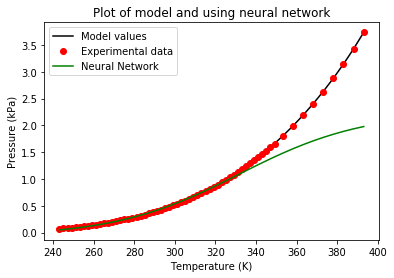

In [38]:
import matplotlib.pyplot as plt

A1 = -7.19045
A2 = 1.34829
A3 = -1.58035
A4 = -5.46680 
Tc = 395.05 #K
Pc = 3.8617 #MPa

def Pmodel(T):
    tau = 1 - T/Tc

    P_mod= Pc * np.exp((A1 * tau + A2 * tau**1.25 + A3 * tau**3 + A4 * tau**7) * Tc / T)
    return P_mod

def model_sse(T):
    err = Pmodel(T) - Pvap
    return np.mean(err**2)

Mean_sq_err = model_sse(T)
print(f'The mean squared errors for the model are: {Mean_sq_err:1.3e}')

plt.plot(T, Pmodel(T), '-k', label = 'Model values')
plt.plot(T, Pvap, 'ro', label = 'Experimental data')
plt.plot(T, nn(ans,np.array([T]).T), 'g', label = 'Neural Network')
plt.title('Plot of model and using neural network')
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (kPa)')
plt.legend();

- The model has mean squared errors in the range of $10^{-8}$ while the neural network has errors with training in the range of $10^{-3}$

- While validating the results, it's seen that the parameters by neural network don't fit while extrapolating.